Link
---
[Lab-1, dynamic Circult](https://medium.com/@_monitsharma/ibm-quantum-challenge-spring-2023-lab-1-fd80c4b5cda1)

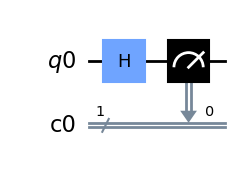

In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

qr = QuantumRegister(1)
cr = ClassicalRegister(1)
qc = QuantumCircuit(qr, cr)

########## your code goes here #######

qc.h(qr[0])   # applies the hadamard on the qubit
qc.measure(qr[0], cr[0])  # applies a measurement operator


qc.draw("mpl")   # draws the circuit

```
A quantum circuit is a computational routine consisting of coherent quantum operations on qubits … It is an ordered sequence of quantum gates, measurements and resets, all of which may be conditioned on and use data from the real-time classical computation.
```

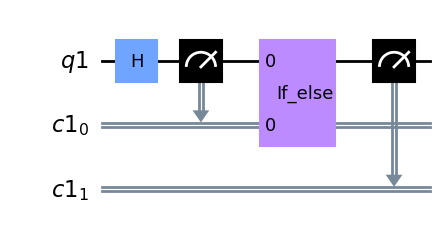

In [2]:
from qiskit import QuantumCircuit
from qiskit.circuit import QuantumRegister, ClassicalRegister

qr = QuantumRegister(1)
cr = ClassicalRegister(2)
qc = QuantumCircuit(qr, cr)

# unpack the qubit and classical bits from the registers
(q0,) = qr   # naming for the quantum register
b0, b1 = cr  # name for the classical bits

# apply Hadamard
qc.h(q0)
# measure
qc.measure(q0, b0)

# begin if test block. the contents of the block are executed if b0 == 1
with qc.if_test((b0, 1)):
    # if the condition is satisfied (b0 == 1), then flip the bit back to 0
    qc.x(q0)
# finally, measure q0 again
qc.measure(q0, b1)

qc.draw(output="mpl", idle_wires=False)


In [3]:
from qiskit import Aer

# initialize the simulator
backend_sim = Aer.get_backend("aer_simulator")

# run the circuit
reset_sim_job = backend_sim.run(qc)
# get the results
reset_sim_result = reset_sim_job.result()
# retrieve the bitstring counts
reset_sim_counts = reset_sim_result.get_counts()

print(f"Counts: {reset_sim_counts}")

Counts: {'00': 512, '01': 512}


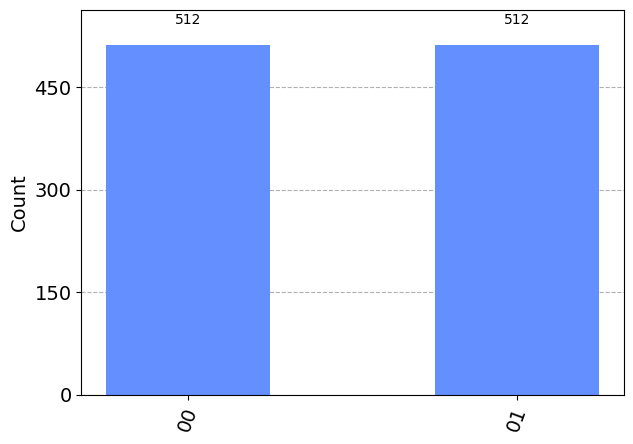

In [4]:
from qiskit.visualization import *

# plot histogram
plot_histogram(reset_sim_counts)

Exercise 1
---
The first assignment was to design a two-qubit circuit, where the second qubit acts differently depending on the value of the first qubit. If the measurement on q0 measures 0, apply an X gate on the q1, if it reads 1, apply a Hadamard on q1.

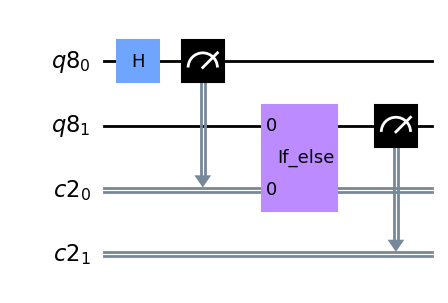

In [5]:
qr = QuantumRegister(2)  # two qubits
cr = ClassicalRegister(2) # two classical bits

q0, q1 = qr    # naming them q0 and q1
b0, b1 = cr    # naming them b0 and b1

qc = QuantumCircuit(qr, cr)
qc.h(q0)       # applying Hadamard on the first qubit
qc.measure(q0, b0)  # applying a measurement

# our dynamic circuit
with qc.if_test((b0, 0)) as else_: # if 0 is measured on classical bit
    qc.x(q1) # apply X
with else_: # if 1 is measured on classical bit
    qc.h(q1) # apply Hadamard gate


qc.measure(q1, b1) # do another measurement
qc.draw(output="mpl", idle_wires=False)

In [6]:
backend_sim = Aer.get_backend("aer_simulator")  # describing our backend

job_1 = backend_sim.run(qc)
result_1 = job_1.result()  # getting the result
counts_1 = result_1.get_counts() # getting the counts for the result

print(f"Counts: {counts_1}")  # print the result

Counts: {'01': 252, '11': 258, '10': 514}


In [12]:
!pip install git+https://github.com/qiskit-community/Quantum-Challenge-Grader.git


  Cloning https://github.com/qiskit-community/Quantum-Challenge-Grader.git to /private/var/folders/xb/s7vwrt4153xbxzr8hc8tbdtr0000gn/T/pip-req-build-0yigi4e_
  Running command git clone --filter=blob:none --quiet https://github.com/qiskit-community/Quantum-Challenge-Grader.git /private/var/folders/xb/s7vwrt4153xbxzr8hc8tbdtr0000gn/T/pip-req-build-0yigi4e_
  Resolved https://github.com/qiskit-community/Quantum-Challenge-Grader.git to commit c096c1a35174be38a554cd1021c87255182f6642
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 248.1 kB/s eta 0:00:0000:0100:01
  Using cached jsonpickle-3.0.1-py2.py3-none-any.whl (40 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.2/67.2 kB 172.4 kB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done


  Created wheel for qc-grader: filename=qc_grader-0.16.0-py3-none-any.whl size=80006 sha256=c93dbcd35f4977ff822a736bc359eeb69aec5af86c854a5aefc070f7a32ac136
  Stored in directory: /private/var/folders/xb/s7vwrt4153xbxzr8hc8tbdtr0000gn/T/pip-ephem-wheel-cache-iquxrjxp/wheels/7e/67/91/88d6a5b4dd4beb318ed4e79c807e2be98b7d3c2ea66565a116
  Created wheel for lrcurve: filename=lrcurve-1.1.0-py3-none-any.whl size=69124 sha256=27afbe81f29d620b6b40a7a07874f2a3594575097d8b3b36d561b1ee39a8c3f9
  Stored in directory: /Users/chu-chinghuang/Library/Caches/pip/wheels/db/3b/df/2b8b6f4b333df04960460f43842d59bfcf455afa6c01fcc2e8
Successfully built qc-grader lrcurve


In [13]:
# Submit your circuit

from qc_grader.challenges.spring_2023 import grade_ex1b

grade_ex1b(qc)

Submitting your answer. Please wait...
Failed: Unable to access service (Forbidden)


In [14]:
controls = QuantumRegister(2, name="control") # first two qubits
target = QuantumRegister(1, name="target")    # the third qubit 

mid_measure = ClassicalRegister(2, name="mid") # first two clbits
final_measure = ClassicalRegister(1, name="final") # next clbit

base = QuantumCircuit(controls, target, mid_measure, final_measure) # this is our base circuit

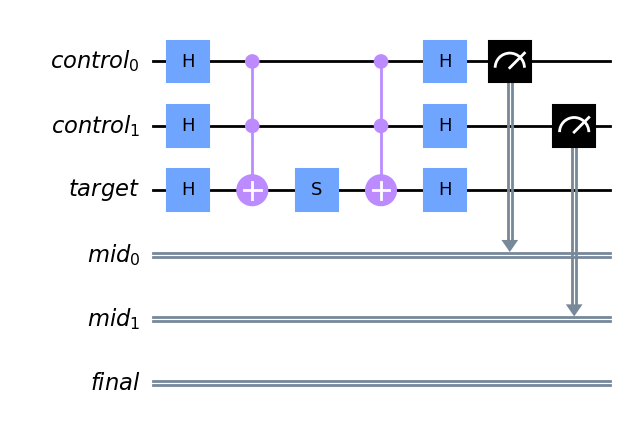

In [15]:
def trial(
    circuit: QuantumCircuit,
    target: QuantumRegister,
    controls: QuantumRegister,
    measures: ClassicalRegister,
):
    """Probabilistically perform Rx(theta) on the target, where cos(theta) = 3/5."""

    ########## your code goes here #######

    circuit.h(target)                   # applying Hadamard
    circuit.h(controls)
    circuit.ccx(*controls, target)        # applying Toffoli
    circuit.s(target)           # applying S phase
    circuit.ccx(*controls, target)
    circuit.h(controls)
    circuit.h(target)
    circuit.measure(controls, measures)


qc = base.copy_empty_like()
trial(qc, target, controls, mid_measure)
qc.draw("mpl", cregbundle=False) 


In [ ]:
# Submit your circuit
from qc_grader.challenges.spring_2023 import grade_ex1c

grade_ex1c(qc)

Exercise 3
---
Our next task will be to check the measurements. If both the measurements of the control bit return |0>, the applied gate is RX(theta) where cos(theta) = 3/5. If any of the measurements is |1>, then the applied gate is simply X, which indicated failure. Therefore, we can tell from the measurements whether we applied the correct gate, without disturbing the coherence of the target qubit.

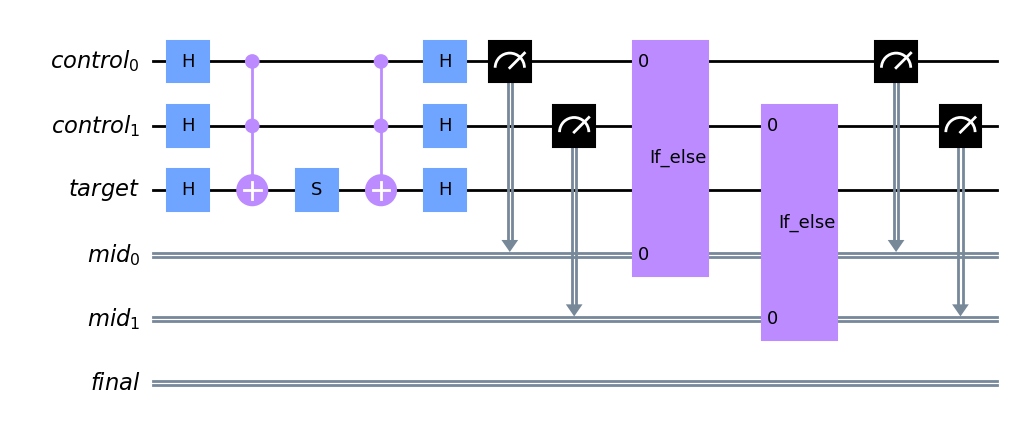

In [16]:
def reset_controls(
    circuit: QuantumCircuit, controls: QuantumRegister, measures: ClassicalRegister
):
    """Reset the control qubits if they are in |1>."""

    ########## your code goes here #######

    with circuit.if_test((measures[0], True)):
        circuit.x(controls[0])
    with circuit.if_test((measures[1], True)):
        circuit.x(controls[1])


qc = base.copy_empty_like()
trial(qc, target, controls, mid_measure)
reset_controls(qc, controls, mid_measure)
qc.measure(controls, mid_measure)
qc.draw("mpl", cregbundle=False)

In [ ]:
# Submit your circuit
from qc_grader.challenges.spring_2023 import grade_ex1d

grade_ex1d(qc)

Exercise 4
---
In the code cell below, fill in the else block with the logic that should be performed in case the syndrome measurement indicates we need to repeat the trial:

1. Reset the target qubit to the zero state. Remember, we already know that it is in the 1 state.
2. Call the trial function on the circuit again.


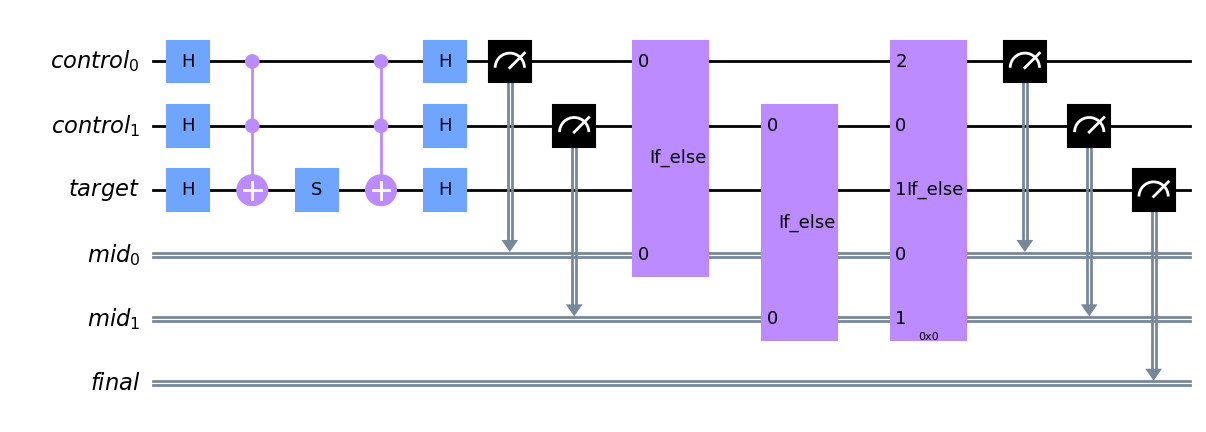

In [17]:
# Set the maximum number of trials
max_trials = 2

# Create a clean circuit with the same structure (bits, registers, etc)
# as the initial base we set up.
circuit = base.copy_empty_like()

# The first trial does not need to reset its inputs, since the controls
# are guaranteed to start in the |0> state.
trial(circuit, target, controls, mid_measure)

# Manually add the rest of the trials.  In the future, we will be
# able to use a dynamic `while` loop to do this, but for now, we
# statically add each loop iteration with a manual condition check
# on each one.  This involves more classical synchronizations than
# the while loop, but will suffice for now.
for _ in range(max_trials - 1):
    reset_controls(circuit, controls, mid_measure)
    with circuit.if_test((mid_measure, 0b00)) as else_:
        # This is the success path, but Qiskit can't directly
        # represent a negative condition yet, so we have an
        # empty `true` block in order to use the `else` branch.
        pass
    with else_:
        ########## your code goes here #######

        # First reset the target.
        circuit.x(target)
        # Then repeat the trial.
        trial(circuit, target, controls, mid_measure)

# We need to measure the control qubits again to ensure we
# get their final results; this is a hardware limitation.
circuit.measure(controls, mid_measure)

# Finally, let's measure our target, to check that we're
# getting the rotation we desired.
circuit.measure(target, final_measure)

circuit.draw("mpl", cregbundle=False)

In [ ]:
# Submit your circuit
from qc_grader.challenges.spring_2023 import grade_ex1e

grade_ex1e(circuit)

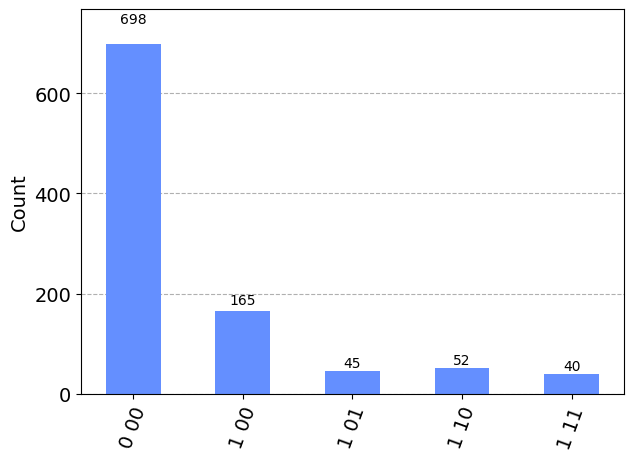

In [18]:
from qiskit_aer import AerSimulator

sim = AerSimulator()
job = sim.run(circuit, shots=1000)
result = job.result()
counts = result.get_counts()

plot_histogram(counts)

In [19]:
# Run on IBM Q
from qiskit_ibm_provider import IBMProvider

provider = IBMProvider()
hub = "system-request"
group = "3-9-23-access"
project = "main"

backend_name = "ibm_peekskill"
backend = provider.get_backend(backend_name, instance=f"{hub}/{group}/{project}")
from qiskit import transpile

qc_transpiled = transpile(circuit, backend)
job = backend.run(qc_transpiled, shots=1000, dynamic=True)

QiskitBackendNotFoundError: 'No backend matches the criteria'

In [ ]:
counts = job.result().get_counts()

plot_histogram(counts)